<table>
    <tr>
      <td>
      <img src='https://www.ideal-ist.eu/sites/default/files/2018-10/logo_quantum_flagship.jpg' width=450>
      </td>
      <td>
      <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Logo_UniJena.svg/1200px-Logo_UniJena.svg.png' width=450>
      </td>
      <td>
      <img src='https://www.akc.ac.cy/images/2022/03/Funded-by-the-European-Union.png' width=450>
      </td>
     </tr>
</table>

<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Quantum Computing, Summer Semester 2022</h1>
<h2 style="text-align: center;"><a href="https://qt.eu/">European Union Quantum Flagship /</a> <a href="https://qtom.qtedu.eu/">QTEdu Quantum Technology Open Master</a></h2>
<h2 style="text-align: center;"><a href="https://www.uni-jena.de/en">Friedrich Schiller University Jena</a></h2>
<h3><em>Quantum Phase Estimation</em></h3>
<h3>Anastasiia Andriievska</h3>

</div>

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools import job_monitor
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit.library import QFT

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

print("Libraries imported successfully!")

Libraries imported successfully!


<h3>Problem 10: Quantum Phase Estimation</h3>
<h4>Use the Quantum Phase Estimation to find the eigenvalues of the CBS to Bell-State conversion gate 𝑈̂ to 5 QuBits Precision.</h4>


The general quantum circuit for phase estimation is shown below. The top register contains $t$ 'counting' qubits, and the bottom contains qubits in the state $|\psi\rangle$:

![image1](https://qiskit.org/textbook/ch-algorithms/images/qpe_tex_qz.png)


### The quantum phase estimation algorithm uses phase kickback to write the phase of $U$ (in the Fourier basis) to the $t$ qubits in the counting register.
#### We then use the inverse QFT to translate this from the Fourier basis into the computational basis, which we can measure.

#### We remember (from the QFT chapter) that in the Fourier basis the topmost qubit completes one full rotation when counting between $0$ and $2^t$. To count to a number, $x$ between $0$ and $2^t$, we rotate this qubit by $\tfrac{x}{2^t}$ around the z-axis.
#### For the next qubit we rotate by $\tfrac{2x}{2^t}$, then $\tfrac{4x}{2^t}$ for the third qubit.

![image2](https://qiskit.org/textbook/ch-algorithms/images/qpe_intuition.jpg)

Setting up the quantum circuit. We will use five qubits - qubits 0 to 4 as counting qubits.

Qubit 4 is as the eigenstate of the unitary operator ($T$). 

We initialize $\vert\psi\rangle = \vert1\rangle$ by applying an $X$ gate:

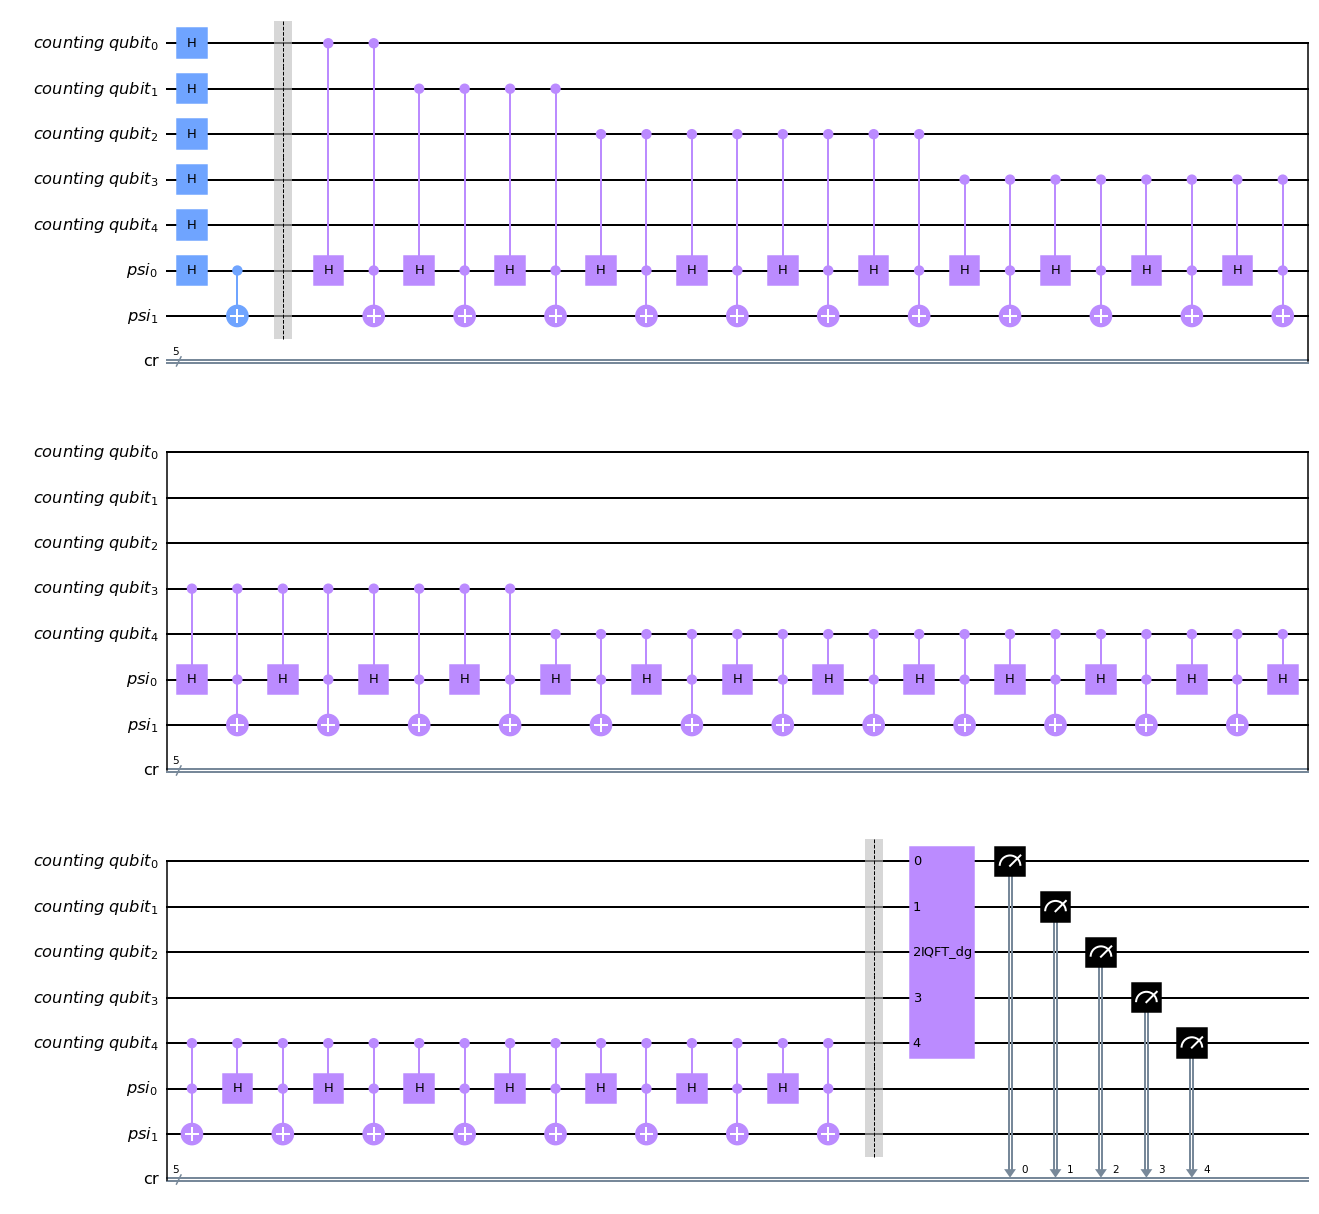

In [38]:
#qpe = QuantumCircuit(7, 5)

cq = QuantumRegister(5, name="counting qubit")
psi = QuantumRegister(2, name="psi")
cr = ClassicalRegister(5, 'cr')
qpe = QuantumCircuit(cq,psi,cr)

qpe.h(0)
qpe.h(1)
qpe.h(2)
qpe.h(3)
qpe.h(4)
qpe.h(5)
qpe.cx(5,6)
qpe.barrier()
for i in range(1):
    qpe.ch(0,5)
    qpe.ccx(0,5,6)

for i in range(2):
    qpe.ch(1,5)
    qpe.ccx(1,5,6)
    
for i in range(4):
    qpe.ch(2,5)
    qpe.ccx(2,5,6)
    
for i in range(8):
    qpe.ch(3,5)
    qpe.ccx(3,5,6)
    
for i in range(16):
    qpe.ch(4,5)
    qpe.ccx(4,5,6)

qpe.barrier()

qpe.compose(QFT(5, inverse=True),range(0,5), inplace=True)

qpe.measure(cq,cr)


qpe.draw()

Job Status: job has successfully run
{'00100': 242, '10000': 74, '11100': 255, '00000': 429}


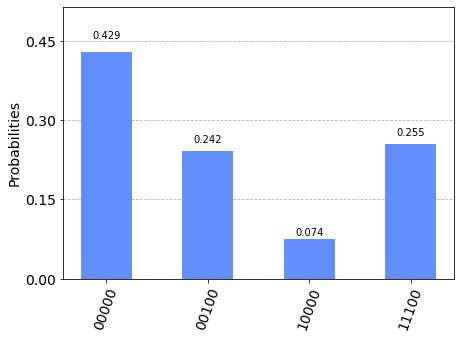

In [39]:
simulator = Aer.get_backend('aer_simulator')
job = execute(qpe, simulator, shots=1000)
job_monitor(job)  # display the job's status
result = job.result()
counts = result.get_counts() 
print(counts)
plot_histogram(counts)

#### U = CNOT*Hadamard >>> U^8 = identity >>> 8 is from 2^3 (U^2j), so applying U until U^8 is sufficient.

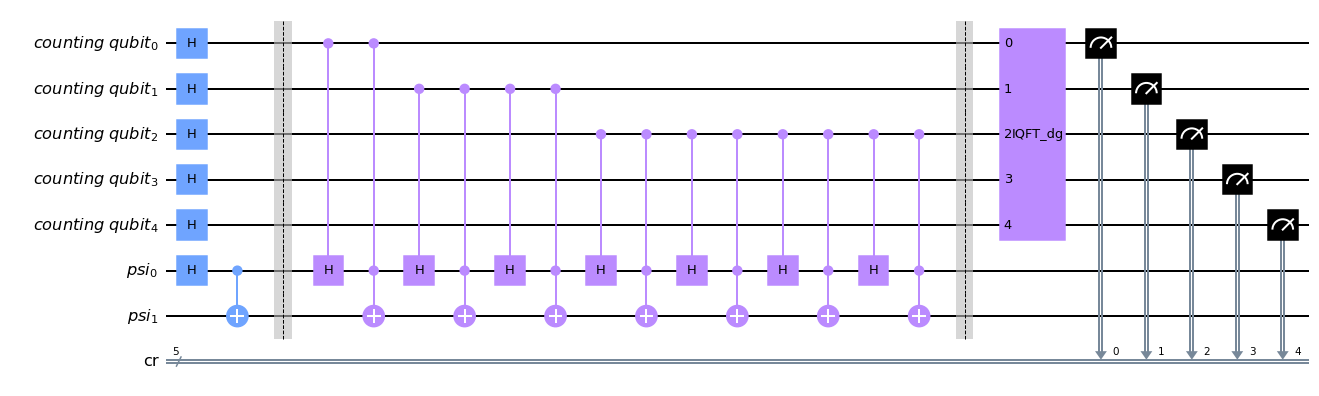

In [41]:
#qpe = QuantumCircuit(7, 5)

cq = QuantumRegister(5, name="counting qubit")
psi = QuantumRegister(2, name="psi")
cr = ClassicalRegister(5, 'cr')
qpe = QuantumCircuit(cq,psi,cr)

qpe.h(0)
qpe.h(1)
qpe.h(2)
qpe.h(3)
qpe.h(4)
qpe.h(5)
qpe.cx(5,6)
qpe.barrier()
for i in range(1):
    qpe.ch(0,5)
    qpe.ccx(0,5,6)

for i in range(2):
    qpe.ch(1,5)
    qpe.ccx(1,5,6)
    
for i in range(4):
    qpe.ch(2,5)
    qpe.ccx(2,5,6)
    

qpe.barrier()

qpe.compose(QFT(5, inverse=True),range(0,5), inplace=True)

qpe.measure(cq,cr)


qpe.draw()

Job Status: job has successfully run
{'00100': 263, '10000': 86, '11100': 236, '00000': 415}


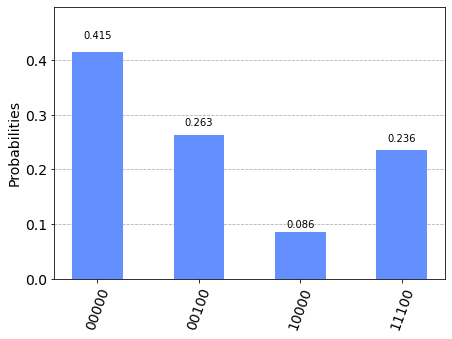

In [42]:
# Let's see the results!
simulator = Aer.get_backend('aer_simulator')
job = execute(qpe, simulator, shots=1000)
job_monitor(job)  #display the job's status
result = job.result()
counts = result.get_counts() 
print(counts)
plot_histogram(counts)

#### 00000 = 0 (decimal), 00100 = 16, 10000 = 28, 11100 = 4. Hence, as 2$^5$ = 32.
We now need to divide our results by $2^n$ to get $\theta$:

$ \theta = 0, \frac{16}{2^5} = \frac{1}{22}\;$  and  $\;\theta = \frac{28}{32} = \frac{7}{8},\; and\; \frac{4}{32} = \frac{1}{8}$

The true value of $\theta$ lies between the values that we get from our counting bits, and this gives us uncertainty and imprecision.

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table

Copyright 2023 Anastasiia Andriievska

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License